# Project Notebook


## Before you start:
* **Make your own copy** of this notebook
  * Select 'File' --> 'Save a copy in Drive...'
  * Add your name in front of the title of the notebook by clicking on the file name above.  

---
---
Spotify Songs of 2023
---
---

***
## Authorship and Resources Used
* Launi Chanthaboury
* My older brother helped me tweak my research question, guiding me in a direction that allowed me to find relationships, or lacktherof, in my data set.
* [MasterClass Article](https://www.masterclass.com/articles/how-to-find-the-bpm-of-a-song)
 - Gave me insight to BPMs and the industry's standard(s).
*[Wiki](https://en.wikipedia.org/wiki/Mode_(music))
 - Mode definition


***
## Data Description and Source
* This data set is comprised of the top streamed songs on the music streaming service, Spotify. Within this data set, there are attributes that give insight to the different types of songs, such as track name, number of artists, BPM, released year, danceability %, and much more.
* [Link to Kaggle Data Set](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)


***
## Research Question
**How do the song characteristic of the top 3 artists' songs compare?** (Taylor Swift, The Weeknd, and Ed Sheeran) **Do their most popular songs follow similar patterns in terms of musical characteristics of songs?** (BPM, Danceability, Valence, etc.) **Where are these artists similar and where are they different?**


This is an interesting topic to me since I am very interested in pop culture, music, and music is apart of my daily life. It is important to notice trends that may be existent in this dataset because it can help us understand what the majority of people like and dislike. Understanding the culture around us is important to better connect with others and be united through music. Although I am not apart of the music industry, maybe someone in this industry would want to analyze the types of musical attributes that are popular among the majority.

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
# enter and test your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# enter and test your code here
path = '/content/drive/MyDrive/Colab Notebooks/spotify-2023-data-set.csv'
df = pd.read_csv(path, encoding='latin-1')


***
## Analyses and Visualizations
* (Delete this instruction) Include code comments in each step to clearly articulate what you are doing and why you are doing it.


In [ ]:
#drop track names that are dirty
df = df[df["track_name"].str.contains("¿") == False]

#drop columns that show music streaming services that are not Spotify
drop_these = ['in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
df = df.drop(columns=drop_these)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
# Top 3 artists overall by streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index()
sorted_artists = artist_streams.sort_values(by='streams', ascending=False)
big_3 = sorted_artists.head(3)
big_3

,artist(s)_name,streams
533,The Weeknd,14121749341
151,Ed Sheeran,13908947204
519,Taylor Swift,12833937029


In [ ]:
# create a combined df for the 3 artists with the most streams
tswift_mask = df.loc[:, 'artist(s)_name'] == 'Taylor Swift'
theweeknd_mask = df.loc[:, 'artist(s)_name'] == 'The Weeknd'
edsheeran_mask = df.loc[:, 'artist(s)_name'] == 'Ed Sheeran'

big_3 = tswift_mask | theweeknd_mask | edsheeran_mask
big_3_df = df[big_3]


# sort by least to most streams out of these big 3
big_3_df = big_3_df.sort_values(by='streams', ascending=True)
big_3_df

# sort by artist alphabetically and streams(respective to each artist)
big_3_artist_sorted = big_3_df.sort_values(by=['artist(s)_name', 'streams'], ascending=[True, True])
big_3_artist_sorted


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
255,Curtains,Ed Sheeran,1,2023,5,5,715,0,39893489,176,F#,Minor,50,44,76,10,0,32,5
924,Celestial,Ed Sheeran,1,2022,9,29,1639,0,176474912,123,D,Major,57,50,85,5,0,16,4
215,Eyes Closed,Ed Sheeran,1,2023,3,23,2915,30,195576623,107,D,Major,78,39,53,30,0,11,6
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,141,D,Major,79,82,86,28,0,4,9
429,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1555511105,126,B,Minor,81,59,90,5,0,36,3
760,Photograph,Ed Sheeran,1,2014,6,20,18778,3,2236667932,108,E,Major,61,20,38,61,0,10,5
684,Thinking Out Loud,Ed Sheeran,1,2014,1,1,33032,0,2280566092,79,D,Major,78,58,45,47,0,18,3
138,Perfect,Ed Sheeran,1,2017,1,1,16596,13,2559529074,95,G#,Major,60,17,45,16,0,11,2
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,96,C#,Minor,83,93,65,58,0,9,8
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206,146,B,Minor,50,67,89,0,0,19,8


In [ ]:
#take the top five streamed The Weeknd songs
top_5theweeknd = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'The Weeknd'
top_5theweeknd = big_3_artist_sorted[top_5theweeknd]
top_5theweeknd = top_5theweeknd.tail(5)
#take the bottom 5 streamed The Weeknd songs
bottom_5theweeknd = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'The Weeknd'
bottom_5theweeknd = big_3_artist_sorted[bottom_5theweeknd]
bottom_5theweeknd = bottom_5theweeknd.head(5)

In [ ]:
#take the top five streamed Ed Sheeran songs
top_5edsheeran = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'Ed Sheeran'
top_5edsheeran = big_3_artist_sorted[top_5edsheeran]
top_5edsheeran = top_5edsheeran.tail(5)
#take the bottom 5 streamed Ed Sheeran songs
bottom_4edsheeran = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'Ed Sheeran'
bottom_4edsheeran = big_3_artist_sorted[bottom_4edsheeran]
bottom_4edsheeran = bottom_4edsheeran.head(4)


In [ ]:
#take the top five streamed Taylor Swift songs
top_5tswift = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'Taylor Swift'
top_5tswift = big_3_artist_sorted[top_5tswift]
top_5tswift = top_5tswift.tail(5)
#take the bottom 5 streamed Taylor swift songs
bottom_5tswift = big_3_artist_sorted.loc[:, 'artist(s)_name'] == 'Taylor Swift'
bottom_5tswift = big_3_artist_sorted[bottom_5tswift]
bottom_5tswift = bottom_5tswift.head(5)

In [ ]:
# combine the top 5 songs for each artist into one master dataframe
big_3_top_5_df = pd.concat([top_5tswift, top_5theweeknd, top_5edsheeran], axis=0).sort_values(by=['artist(s)_name', 'streams'], ascending=[True, True])
big_3_top_5_df

# combine the bottom 5 songs for each artist into one master dataframe
big_3_bottom_5_df = pd.concat([bottom_5tswift, bottom_5theweeknd, bottom_4edsheeran], axis=0).sort_values(by=['artist(s)_name', 'streams'], ascending=[True, True])
big_3_bottom_5_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
255,Curtains,Ed Sheeran,1,2023,5,5,715,0,39893489,176,F#,Minor,50,44,76,10,0,32,5
924,Celestial,Ed Sheeran,1,2022,9,29,1639,0,176474912,123,D,Major,57,50,85,5,0,16,4
215,Eyes Closed,Ed Sheeran,1,2023,3,23,2915,30,195576623,107,D,Major,78,39,53,30,0,11,6
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,141,D,Major,79,82,86,28,0,4,9
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206,146,B,Minor,50,67,89,0,0,19,8
113,Mine (Taylor's Version),Taylor Swift,1,2023,7,7,99,15,36912123,121,G,Major,65,49,78,0,0,17,4
83,Back To December (Taylor's Version),Taylor Swift,1,2023,7,7,139,17,39228929,142,D,Major,50,20,64,1,0,12,3
69,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,7,148,24,39578178,82,G#,Major,51,22,53,1,0,15,3
206,Hits Different,Taylor Swift,1,2023,5,26,547,0,68616963,106,F,Major,67,24,78,15,0,30,4
576,Phantom Regret by Jim,The Weeknd,1,2022,1,7,768,0,31959571,108,A,Minor,46,23,48,75,30,14,4


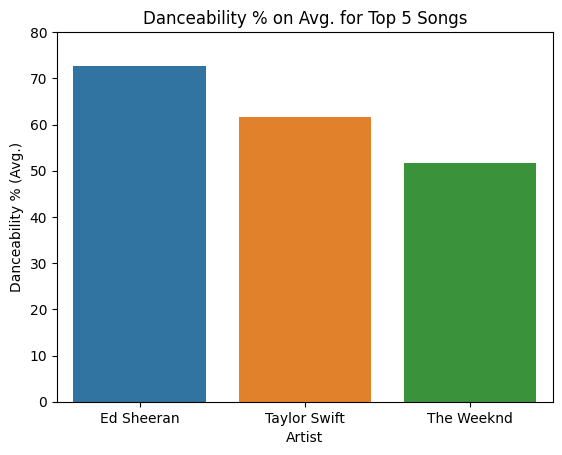

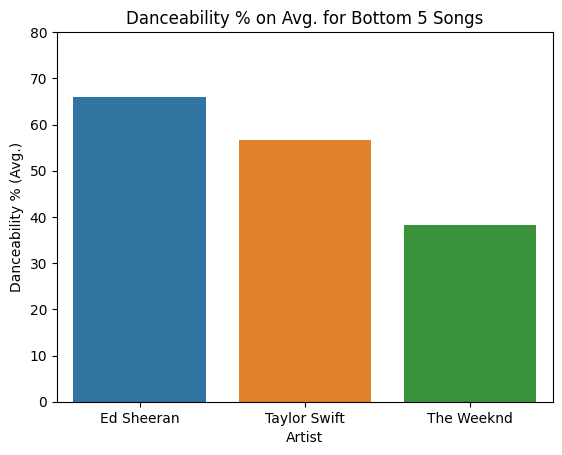

In [ ]:
# danceability % on avg for top 5 songs for each artist
grouped_by_artist = big_3_top_5_df.groupby('artist(s)_name')['danceability_%'].mean()
sns.barplot(x=grouped_by_artist.index, y=grouped_by_artist.values)
plt.ylim(0, 80)
plt.xlabel('Artist')
plt.ylabel('Danceability % (Avg.)')
plt.title('Danceability % on Avg. for Top 5 Songs')
plt.show()

# danceability % on avg for bottom 5 songs for each artist
grouped_by_artist = big_3_bottom_5_df.groupby('artist(s)_name')['danceability_%'].mean()
sns.barplot(x=grouped_by_artist.index, y=grouped_by_artist.values)
plt.ylim(0, 80)
plt.xlabel('Artist')
plt.ylabel('Danceability % (Avg.)')
plt.title('Danceability % on Avg. for Bottom 5 Songs')
plt.show()

# conclusion: for these 3 artists, when a song has higher percentage of danceability, it gets more streams

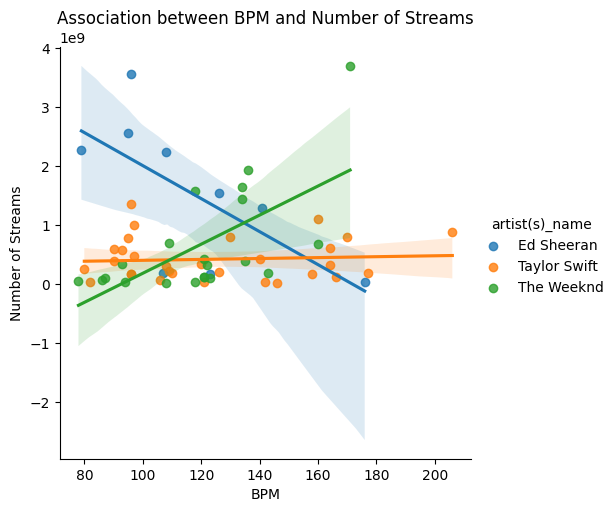

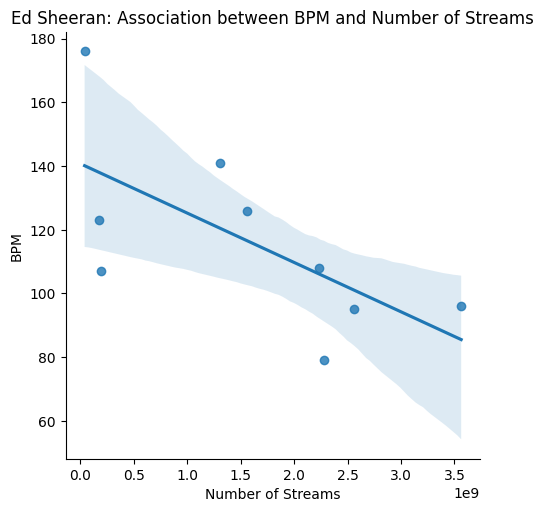

In [ ]:
# correlation between BPM and number of streams for all songs from top 3 artists
sns.lmplot(x = 'bpm', y = 'streams', data = big_3_artist_sorted, hue = 'artist(s)_name')
plt.xlabel('BPM')
plt.ylabel('Number of Streams')
plt.title('Association between BPM and Number of Streams')
plt.show()


ed_mask = big_3_artist_sorted.loc[:,'artist(s)_name'] == 'Ed Sheeran'
ed_df = big_3_artist_sorted[ed_mask]

sns.lmplot(x = 'streams', y = 'bpm', data = ed_df)
plt.ylabel('BPM')
plt.xlabel('Number of Streams')
plt.title('Ed Sheeran: Association between BPM and Number of Streams')
plt.show()


# conclusion: Ed Sheeran is the only artist that does better when his songs are slower in BPM on avg.


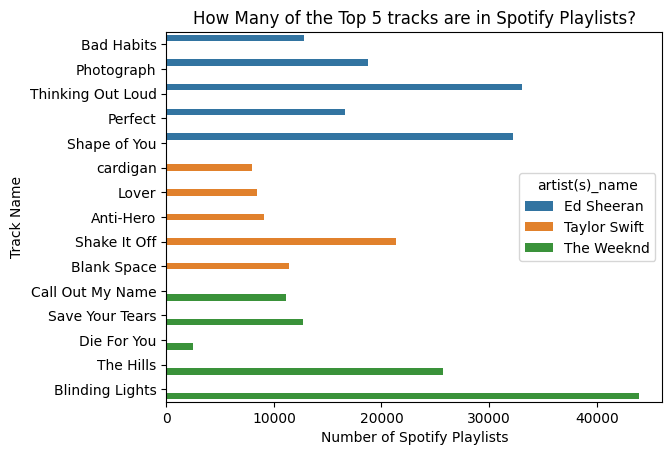

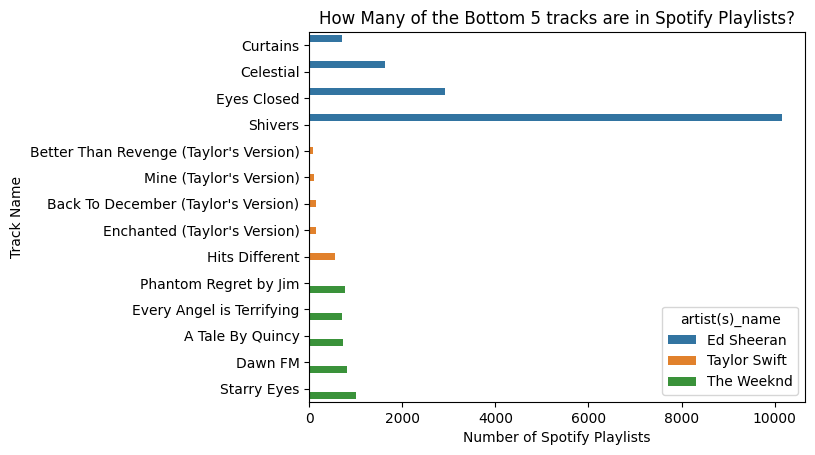

In [ ]:
# Out of top 5 songs, how many spotify playlist contain this song?
sns.barplot(x = 'in_spotify_playlists', y = 'track_name', data = big_3_top_5_df, hue = 'artist(s)_name')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Track Name')
plt.title('How Many of the Top 5 tracks are in Spotify Playlists?')
plt.show()

# Out of bottom 5 songs, how many spotify playlist contain this song?

sns.barplot(x = 'in_spotify_playlists', y = 'track_name', data = big_3_bottom_5_df, hue = 'artist(s)_name')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Track Name')
plt.title('How Many of the Bottom 5 tracks are in Spotify Playlists?')
plt.show()

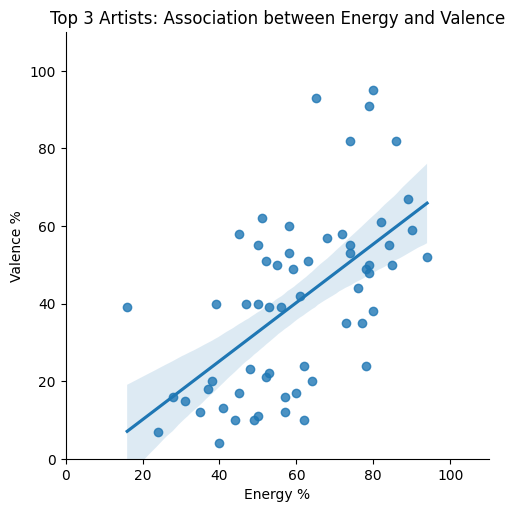

In [ ]:
# correlation between energy and valence for top 3 artists and all their songs
sns.lmplot(x = 'energy_%', y = 'valence_%', data = big_3_artist_sorted)
plt.ylim(0, 110)
plt.xlim(0,110)
plt.xlabel('Energy %')
plt.ylabel('Valence %')
plt.title('Top 3 Artists: Association between Energy and Valence')
plt.show()

#conclusion: energy and valence are directly related for the top 3 artists and all their songs

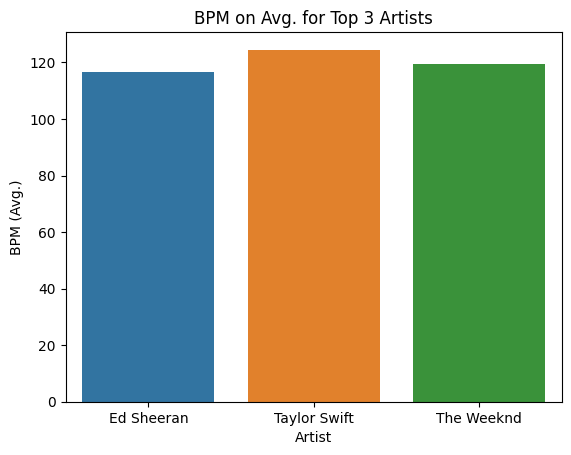

In [ ]:
# find avg bpm for top 3 artists and all of their songs
grouped_by_artist = big_3_artist_sorted.groupby('artist(s)_name')['bpm'].mean()
sns.barplot(x=grouped_by_artist.index, y=grouped_by_artist.values)
plt.xlabel('Artist')
plt.ylabel('BPM (Avg.)')
plt.title('BPM on Avg. for Top 3 Artists')
plt.show()


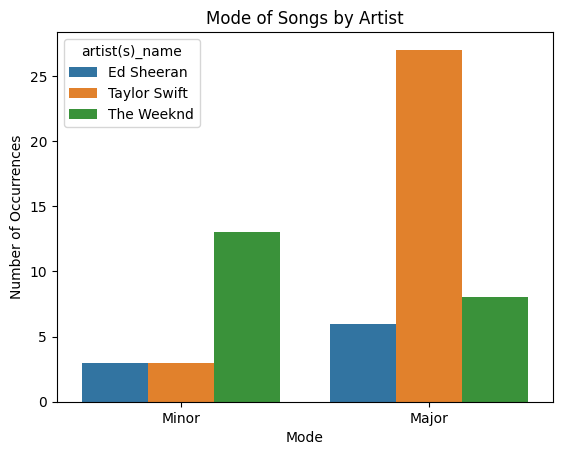

In [ ]:
# create a countplot to see how many times each artist uses either a Minor or Major mode
sns.countplot(x = 'mode', data = big_3_artist_sorted, hue = 'artist(s)_name')
plt.xlabel('Mode')
plt.ylabel('Number of Occurrences')
plt.title('Mode of Songs by Artist')
plt.show()

In [ ]:
# this is mostly just so I could view the mean for both top 5 and bottom 5 songs for each artist to help me conceptualize any trends
# compare the averages of song characteristics for the top and bottom 5 Taylor Swift songs
tswifttop_dance_mean_value = top_5tswift['danceability_%'].mean()
tswiftbottom_dance_mean_value = bottom_5tswift['danceability_%'].mean()

print('Danceability % on average for the top 5 Taylor Swift Songs is: ' + str(tswifttop_dance_mean_value))
print('Danceability % on average for the bottom 5 Taylor Swift Songs is: ' + str(tswiftbottom_dance_mean_value))

tswifttop_valence_mean_value = top_5tswift['valence_%'].mean()
tswiftbottom_valence_mean_value = bottom_5tswift['valence_%'].mean()

print('Valence % on average for the top 5 Taylor Swift Songs is: ' + str(tswifttop_valence_mean_value))
print('Valence % on average for the bottom 5 Taylor Swift Songs is: ' + str(tswiftbottom_valence_mean_value))

tswifttop_energy_mean_value = top_5tswift['energy_%'].mean()
tswiftbottom_energy_mean_value = bottom_5tswift['energy_%'].mean()

print('Energy % on average for the top 5 Taylor Swift Songs is: ' + str(tswifttop_energy_mean_value))
print('Energy % on average for the bottom 5 Taylor Swift Songs is: ' + str(tswiftbottom_energy_mean_value))

tswifttop_liveness_mean_value = top_5tswift['liveness_%'].mean()
tswiftbottom_liveness_mean_value = bottom_5tswift['liveness_%'].mean()

print('Liveness % on average for the top 5 Taylor Swift Songs is: ' + str(tswifttop_liveness_mean_value))
print('Liveness % on average for the bottom 5 Taylor Swift Songs is: ' + str(tswiftbottom_liveness_mean_value))

tswifttop_bpm_mean_value = top_5tswift['bpm'].mean()
tswiftbottom_bpm_mean_value = bottom_5tswift['bpm'].mean()

print('BPM on average for the top 5 Taylor Swift Songs is: ' + str(tswifttop_bpm_mean_value))
print('BPM on average for the bottom 5 Taylor Swift Songs is: ' + str(tswiftbottom_bpm_mean_value))


Danceability % on average for the top 5 Taylor Swift Songs is: 61.6
Danceability % on average for the bottom 5 Taylor Swift Songs is: 56.6
Valence % on average for the top 5 Taylor Swift Songs is: 61.2
Valence % on average for the bottom 5 Taylor Swift Songs is: 36.4
Energy % on average for the top 5 Taylor Swift Songs is: 64.8
Energy % on average for the bottom 5 Taylor Swift Songs is: 72.4
Liveness % on average for the top 5 Taylor Swift Songs is: 23.0
Liveness % on average for the bottom 5 Taylor Swift Songs is: 18.6
BPM on average for the top 5 Taylor Swift Songs is: 137.8
BPM on average for the bottom 5 Taylor Swift Songs is: 119.4


In [ ]:
# this is mostly just so I could view the mean for both top 5 and bottom 5 songs for each artist to help me conceptualize any trends
# compare the averages of song characteristics for the top and bottom 5 songs by The Weeknd
theweeknd_dance_mean_value = top_5theweeknd['danceability_%'].mean()
theweekndbottom_dance_mean_value = bottom_5theweeknd['danceability_%'].mean()

print('Danceability % on average for the top 5 The Weeknd Songs is: ' + str(theweeknd_dance_mean_value))
print('Danceability % on average for the bottom 5 The Weeknd Songs is: ' + str(theweekndbottom_dance_mean_value))

theweekndtop_valence_mean_value = top_5theweeknd['valence_%'].mean()
theweekndbottom_valence_mean_value = bottom_5theweeknd['valence_%'].mean()

print('Valence % on average for the top 5 The Weeknd Songs is: ' + str(theweekndtop_valence_mean_value))
print('Valence % on average for the bottom 5 The Weeknd Songs is: ' + str(theweekndbottom_valence_mean_value))

theweekndtop_energy_mean_value = top_5theweeknd['energy_%'].mean()
theweekndbottom_energy_mean_value = bottom_5theweeknd['energy_%'].mean()

print('Energy % on average for the top 5 The Weeknd Songs is: ' + str(theweekndtop_energy_mean_value))
print('Energy % on average for the bottom 5 The Weeknd Songs is: ' + str(theweekndbottom_energy_mean_value))

theweekndtop_liveness_mean_value = top_5theweeknd['liveness_%'].mean()
theweekndbottom_liveness_mean_value = bottom_5theweeknd['liveness_%'].mean()

print('Liveness % on average for the top 5 The Weeknd Songs is: ' + str(theweekndtop_liveness_mean_value))
print('Liveness % on average for the bottom 5 The Weeknd Songs is: ' + str(theweekndbottom_liveness_mean_value))

theweekndtop_bpm_mean_value = top_5theweeknd['bpm'].mean()
theweekndbottom_bpm_mean_value = bottom_5theweeknd['bpm'].mean()

print('BPM on average for the top 5 The Weeknd Songs is: ' + str(theweekndtop_bpm_mean_value))
print('BPM on average for the bottom 5 The Weeknd Songs is: ' + str(theweekndbottom_bpm_mean_value))

Danceability % on average for the top 5 The Weeknd Songs is: 51.6
Danceability % on average for the bottom 5 The Weeknd Songs is: 38.2
Valence % on average for the top 5 The Weeknd Songs is: 35.8
Valence % on average for the bottom 5 The Weeknd Songs is: 30.6
Energy % on average for the top 5 The Weeknd Songs is: 66.2
Energy % on average for the bottom 5 The Weeknd Songs is: 56.4
Liveness % on average for the top 5 The Weeknd Songs is: 24.2
Liveness % on average for the bottom 5 The Weeknd Songs is: 19.2
BPM on average for the top 5 The Weeknd Songs is: 138.6
BPM on average for the bottom 5 The Weeknd Songs is: 96.8


In [ ]:
# this is mostly just so I could view the mean for both top 5 and bottom 5 songs for each artist to help me conceptualize any trends
# compare the averages of song characteristics for the top and bottom 5 songs by Ed Sheeran
edsheeran_dance_mean_value = top_5edsheeran['danceability_%'].mean()
edsheeranbottom_dance_mean_value = bottom_4edsheeran['danceability_%'].mean()

print('Danceability % on average for the top 5 Ed Sheeran Songs is: ' + str(edsheeran_dance_mean_value))
print('Danceability % on average for the bottom 4 Ed Sheeran Songs is: ' + str(edsheeranbottom_dance_mean_value))

edsheerantop_valence_mean_value = top_5edsheeran['valence_%'].mean()
edsheeranbottom_valence_mean_value = bottom_4edsheeran['valence_%'].mean()

print('Valence % on average for the top 5 Ed Sheeran Songs is: ' + str(edsheerantop_valence_mean_value))
print('Valence % on average for the bottom 4 Ed Sheeran Songs is: ' + str(edsheeranbottom_valence_mean_value))

edsheerantop_energy_mean_value = top_5edsheeran['energy_%'].mean()
edsheeranbottom_energy_mean_value = bottom_4edsheeran['energy_%'].mean()

print('Energy % on average for the top 5 Ed Sheeran Songs is: ' + str(edsheerantop_energy_mean_value))
print('Energy % on average for the bottom 4 Ed Sheeran Songs is: ' + str(edsheeranbottom_energy_mean_value))

edsheerantop_liveness_mean_value = top_5edsheeran['liveness_%'].mean()
edsheeranbottom_liveness_mean_value = bottom_4edsheeran['liveness_%'].mean()

print('Liveness % on average for the top 5 Ed Sheeran Songs is: ' + str(edsheerantop_liveness_mean_value))
print('Liveness % on average for the bottom 4 Ed Sheeran Songs is: ' + str(edsheeranbottom_liveness_mean_value))

edsheerantop_bpm_mean_value = top_5edsheeran['bpm'].mean()
edsheeranbottom_bpm_mean_value = bottom_4edsheeran['bpm'].mean()

print('BPM on average for the top 5 Ed Sheeran Songs is: ' + str(edsheerantop_bpm_mean_value))
print('BPM on average for the bottom 4 Ed Sheeran Songs is: ' + str(edsheeranbottom_bpm_mean_value))

Danceability % on average for the top 5 Ed Sheeran Songs is: 72.6
Danceability % on average for the bottom 4 Ed Sheeran Songs is: 66.0
Valence % on average for the top 5 Ed Sheeran Songs is: 49.4
Valence % on average for the bottom 4 Ed Sheeran Songs is: 53.75
Energy % on average for the top 5 Ed Sheeran Songs is: 56.6
Energy % on average for the bottom 4 Ed Sheeran Songs is: 75.0
Liveness % on average for the top 5 Ed Sheeran Songs is: 16.8
Liveness % on average for the bottom 4 Ed Sheeran Songs is: 15.75
BPM on average for the top 5 Ed Sheeran Songs is: 100.8
BPM on average for the bottom 4 Ed Sheeran Songs is: 136.75


***
## Conclusions
Key Take Aways:
* When looking at BPM and Number of Streams, Ed Sheeran is the only artist out of the three that have an increase of number of streams when the BPM goes down. This means that slower Ed Sheeran songs are more popular than ones that have a faster BPM. This means that BPM and Number of Streams is inversely related, as seen by the scatterplot.

* For all three artists, the more energy their song perceived to have, the more valence their songs also perceived to have. Valence is refered to as the positivity of one's song. While this seems like a natural and logical conclusion, I still thought it was interesting because there are plenty of songs that can have lots of energy but with more negativity associated with the song. However, it makes a lot of sense since these songs are apart of the Pop Genre, and one would assume that high energy and high positivity are closely related.

* When looking at the top 5 songs for each artist and their bottom 5 songs (bottom 4 for Ed Sheeran, since he only had 9 total songs in this data set) we can see that those that were streamed more often than the bottom of the pack were also found in a lot more Spotify playlist. This makes a lot of sense because the more popular a song is, the more likely some Spotify user is going to add it to their playlist. However, when you really compare the top of the pack versus the bottom, the top 5 songs for each artist out performs the bottom by far, in terms of being added into a playlist. When just visually looking at the two graphs, you can see just how little people add those bottom 5 songs to a playlist. I still find this quite peculiar because although these are considered the bottom of the pack, these songs from these artists are still extremely popular, given their status.

* In terms of BPM alone, we can see that there is a similar BPM across the three top performing artists. The average BPM of each artists lies within the range of 116.78 - 119.62. *(Ed Sheeran: 116.78BPM, Taylor Swift: 124.5BPM, The Weeknd: 119.62)* And when we look at the overall average of BPM within the entire data set, we can see that the average BPM is 122.68. While this is slightly higher, it is still within a very close range. This makes logical sense because according to [MasterClass Article](https://www.masterclass.com/articles/how-to-find-the-bpm-of-a-song) , the perfect BPM for crafting a hit is 120 BPM.

* Different artists and their modes. According to [Wiki](https://en.wikipedia.org/wiki/Mode_(music)), a mode can be described as *"a type of musical scale coupled with a set of characteristic melodic and harmonic behaviors." * The two different modes can be described as Major and Minor. Major is often perceived as the "happy" chords, while minor is often seen as the 'sad' chords. In terms of the three artists, we can see that Taylor Swift's songs are labeled as Major, Ed Sheeran is mostly major, and The Weeknd's songs are typically seen as in Minor.

* When looking at the top 5 and bottom 5 songs and its danceability percentage, we can see that the more popular songs have higher danceability percentages. The lesser streamed songs have a lower danceability percentage. I think that since these are pop songs, the liklihood of a song that is more "danceable" will get more streams since a lot of times pop music is meant to lighten the mood. Pop music is also a feel-good happy genre a lot of the times, so this aligns with those values.

---
---

In [ ]:
#@title Completed the exercise?
#@markdown Click on the arrow to the left to create the submission form.

import os
import sys

tool_path = '/content/cs125_tools/'

if not os.path.exists(tool_path):
  ! git clone --quiet https://github.com/bsheese/cs125_tools.git

if tool_path not in sys.path:
  sys.path.append(tool_path)

import project_report_response as prr

prr.display_form(prr.er_question_list)


If this form does not display correctly in Colab, select "Runttime" from the menu at the top, then select "Restart and run all"
Your first name:


Text(value='', placeholder='Enter your first name here')


Your last name:


Text(value='', placeholder='Enter your last name here')


What class was this project for?


Dropdown(options=('None selected', 'CS/DS125', 'DS225', 'CS/DS377', 'CS380/DS395'), value='None selected')


Which project are you submitting?


Dropdown(options=('None selected', '9.9.2 Visualizations - Multiple', '13.9.1 Correlations/Scatterplots', '15.…


Share your notebook.
Select 'Share' at the top of the screen. Then select 'Get Link'.
Change the Link so anyone can view it.
Click 'Copy Link', then 'Done'. Paste the link here.


Textarea(value='', placeholder='Enter your response here')

In [ ]:
#@title Ready to Submit?
#@markdown If you have completed the project and the submission form:
#@markdown * check the box 'Ready' box below
#@markdown * execute this cell

Ready = True #@param {type:"boolean"}

try:
  if Ready == True:
    prr.submit_exercise_response(prr.er_question_list)

  else:
    print('NOT SUBMITTED!!!')
    print('Check the ready box if you are ready to submit your response.')

except:
  print('NOT SUBMITTED!!!')
  print('Execute the cell above to create the form.')

Please enter your first and last name in the form above and then rerun this cell.
